In [7]:
# Exercise 1 (p.368, Chap.9)

In [8]:
# Conceptual
# 1. This problem involves hyperplanes in two dimensions.
# (a) Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of
# points for which 1 + 3X1 − X2 > 0, as well as the set of points
# for which 1 + 3X1 − X2 < 0.
# (b) On the same plot, sketch the hyperplane −2 + X1 + 2X2 = 0.
# Indicate the set of points for which −2 + X1 + 2X2 > 0, as well
# as the set of points for which −2 + X1 + 2X2 < 0.

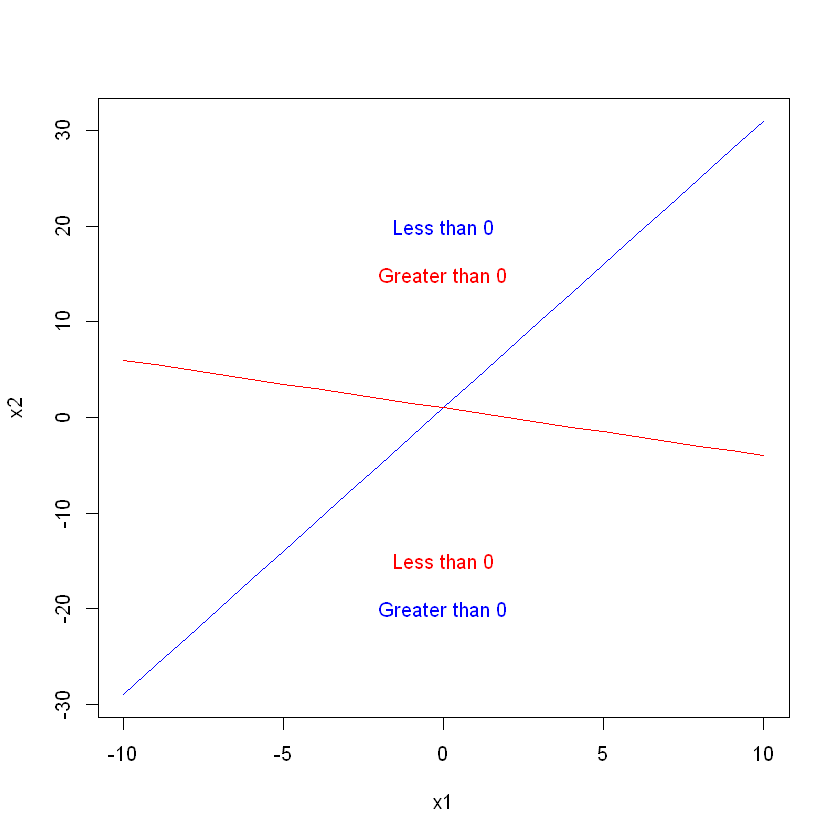

In [10]:
x1 <- -10:10
x2 <- 1 + 3 * x1
plot(x1, x2, type = "l", col = "blue")
text(c(0), c(-20), "Greater than 0", col = "blue")
text(c(0), c(20), "Less than 0", col = "blue")
lines(x1, 1 - x1/2, col = "red")
text(c(0), c(-15), "Less than 0", col = "red")
text(c(0), c(15), "Greater than 0", col = "red")

In [13]:
# 2 (p.368, Chap.9)

In [14]:
# 2. We have seen that in p = 2 dimensions, a linear decision boundary
# takes the form β0+β1X1+β2X2 = 0. We now investigate a non-linear
# decision boundary.
# (a) Sketch the curve
# (1 + X1)
# 2 + (2 − X2)
# 2 = 4.
# (b) On your sketch, indicate the set of points for which
# (1 + X1)
# 2 + (2 − X2)
# 2 > 4,
# as well as the set of points for which
# (1 + X1)
# 2 + (2 − X2)
# 2 ≤ 4.
# (c) Suppose that a classifier assigns an observation to the blue class
# if
# (1 + X1)
# 2 + (2 − X2)
# 2 > 4,
# and to the red class otherwise. To what class is the observation
# (0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?
# (d) Argue that while the decision boundary in (c) is not linear in
# terms of X1 and X2, it is linear in terms of X1, X2
# 1 , X2, and
# X2
# 2 

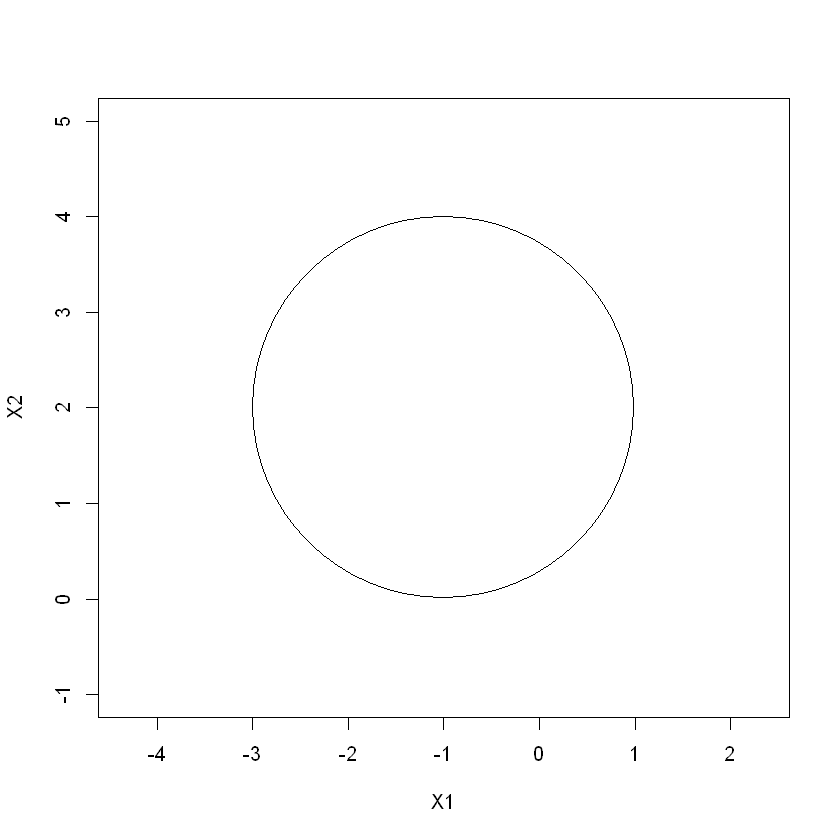

In [12]:
# a.
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

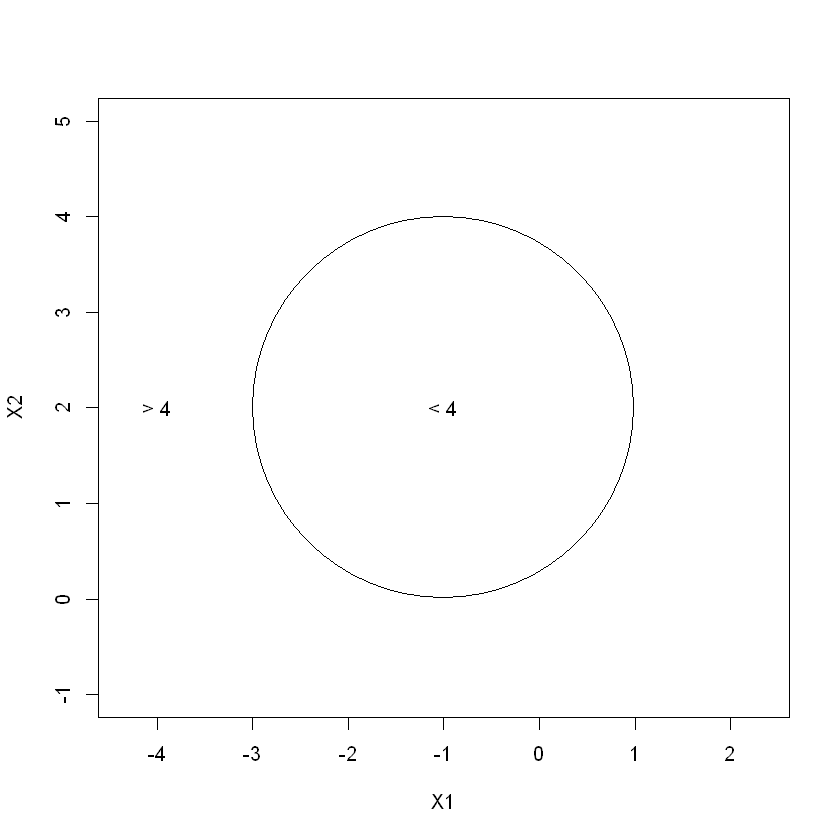

In [15]:
# b
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

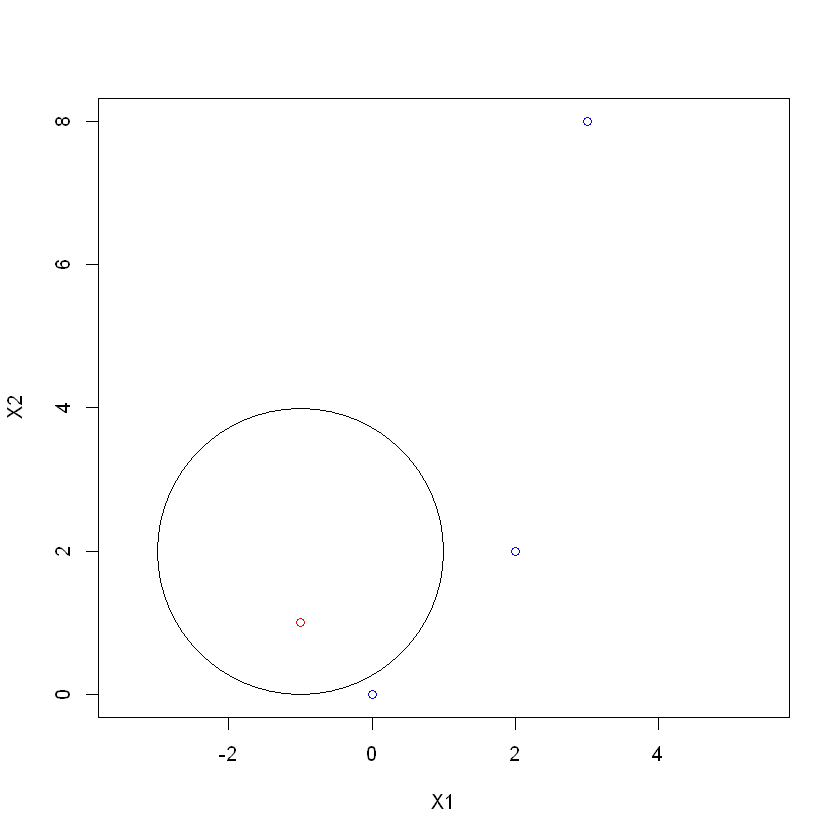

In [16]:
# c
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

In [17]:
# d. yes, we can expand the equation of the decision boundary
# (1+X1)2+(2−X2)2=4
# by
# X21+X22+2X1−4X2+1=0
# it's linear in terms of X1, X21, X2 and x22.

In [19]:
# #  4 (p.369, Chap.9)
# Generate a simulated two-class data set with 100 observations and
# two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector
# machine with a polynomial kernel (with degree greater than 1) or a
# radial kernel will outperform a support vector classifier on the training data. Which technique performs best on the test data? Make
# plots and report training and test error rates in order to back up
# your assertions

In [22]:
install.packages("e1071", dep = TRUE)

also installing the dependencies 'proxy', 'mlbench', 'SparseM', 'slam'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
proxy 0.4-25 0.4-26              TRUE
slam  0.1-48 0.1-50              TRUE
e1071  1.7-6  1.7-9              TRUE

  Binaries will be installed
package 'proxy' successfully unpacked and MD5 sums checked
package 'mlbench' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mcortez\AppData\Local\Temp\Rtmp4OmLfE\downloaded_packages


Warning message:
"package 'e1071' was built under R version 3.6.3"

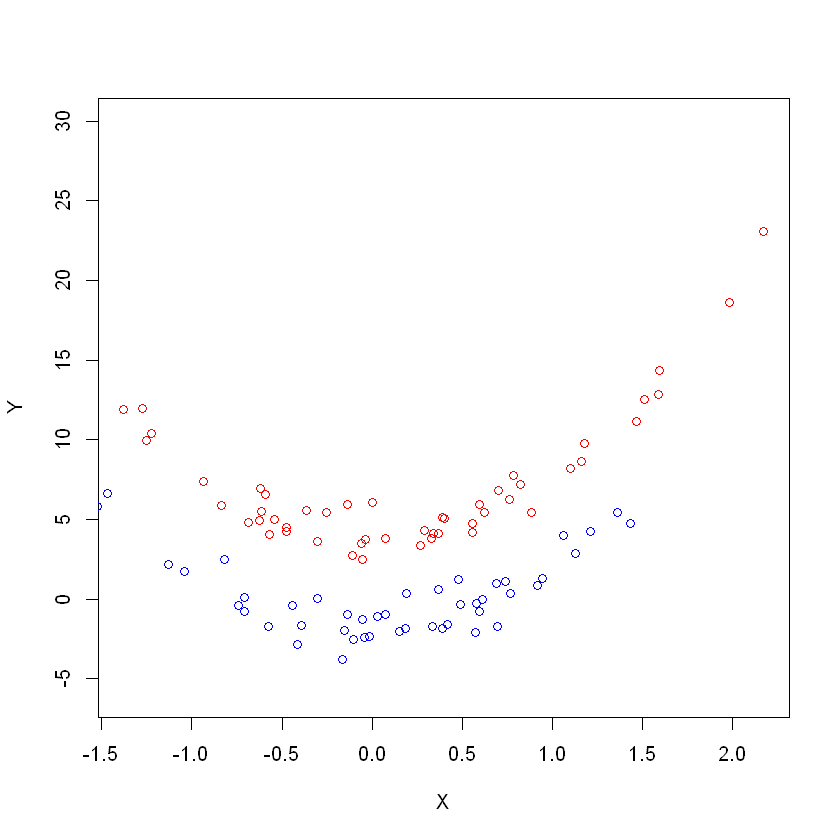

In [23]:
# non linear separation between the two classes
library(e1071)
set.seed(1)
x <- rnorm(100)
y <- 4 * x^2 + 1 + rnorm(100)
class <- sample(100, 50)
y[class] <- y[class] + 3
y[-class] <- y[-class] - 3
plot(x[class], y[class], col = "red", xlab = "X", ylab = "Y", ylim = c(-6, 30))
points(x[-class], y[-class], col = "blue")

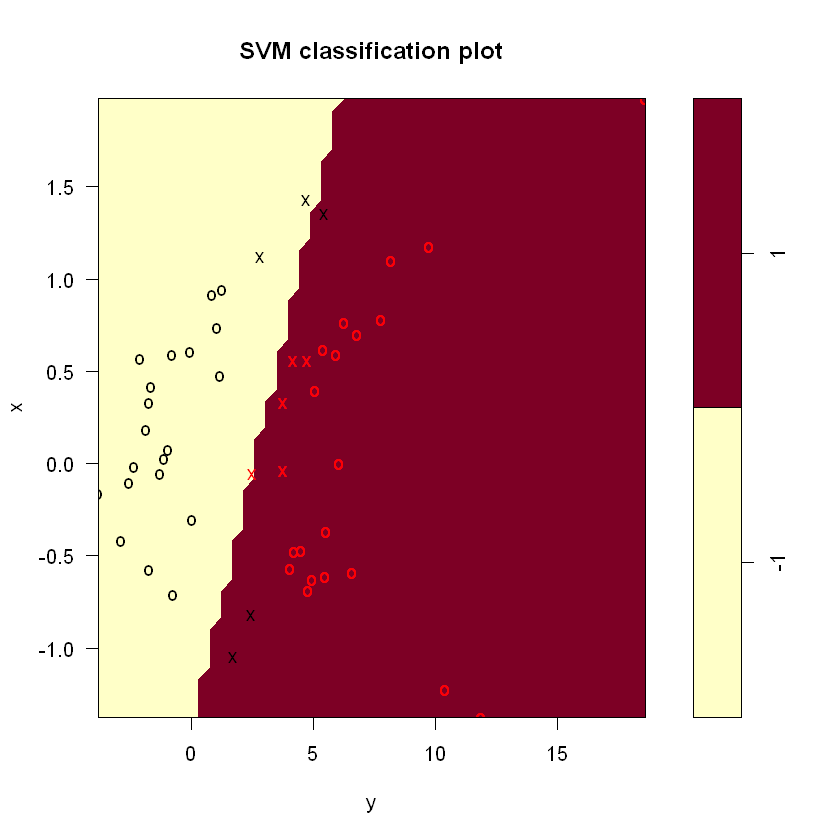

In [24]:
# fit a support vector classifier on the training data.

z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = x, y = y, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data.train, kernel = "linear", cost = 10)
plot(svm.linear, data.train)

In [25]:
table(predict = predict(svm.linear, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 22  0
     1   3 25

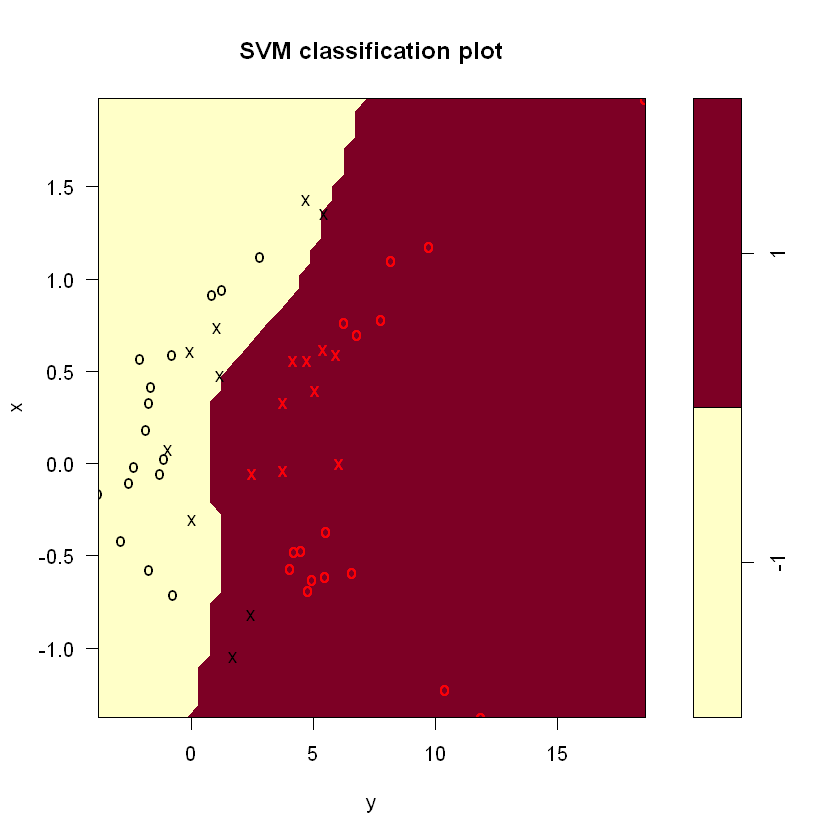

In [26]:
# The support vector classifier makes 3 errors on the training data.

# we fit a support vector machine with a polynomial kernel.

svm.poly <- svm(z ~ ., data = data.train, kernel = "polynomial", cost = 10)
plot(svm.poly, data.train)

In [27]:
table(predict = predict(svm.poly, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 21  0
     1   4 25

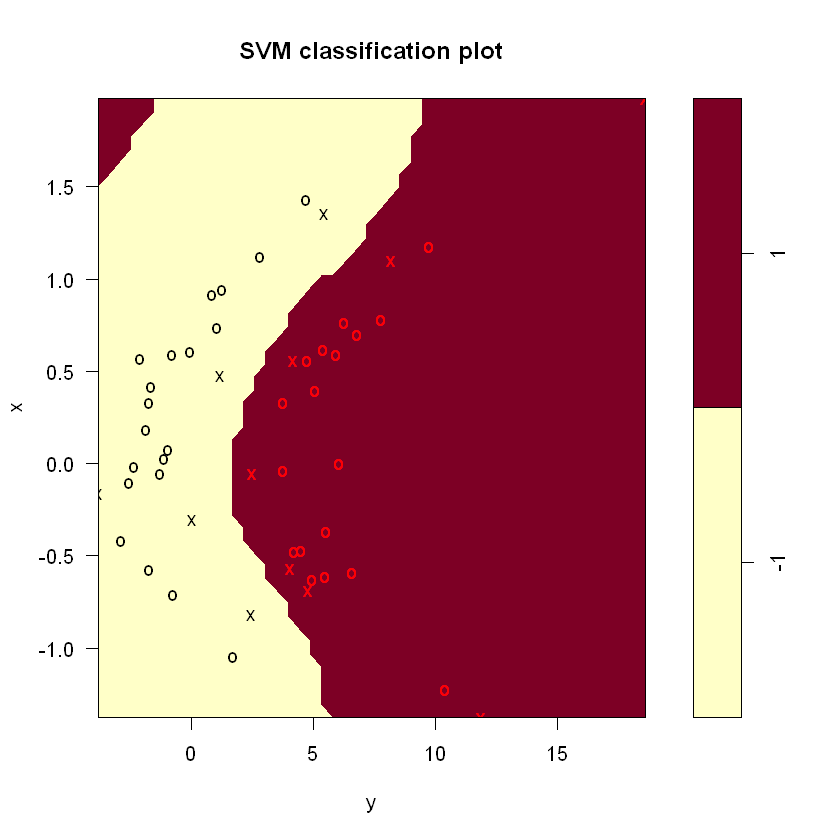

In [28]:
# support vector machine with a polynomial kernel of degree 3 makes 4 errors on the training data.

# Finally, we fit a support vector machine with a radial kernel and a gamma of 1.

svm.radial <- svm(z ~ ., data = data.train, kernel = "radial", gamma = 1, cost = 10)
plot(svm.radial, data.train)

In [29]:
table(predict = predict(svm.radial, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 25  0
     1   0 25

In [30]:
# makes 0 error on the training data.
# how these models fare when applied to the test data.

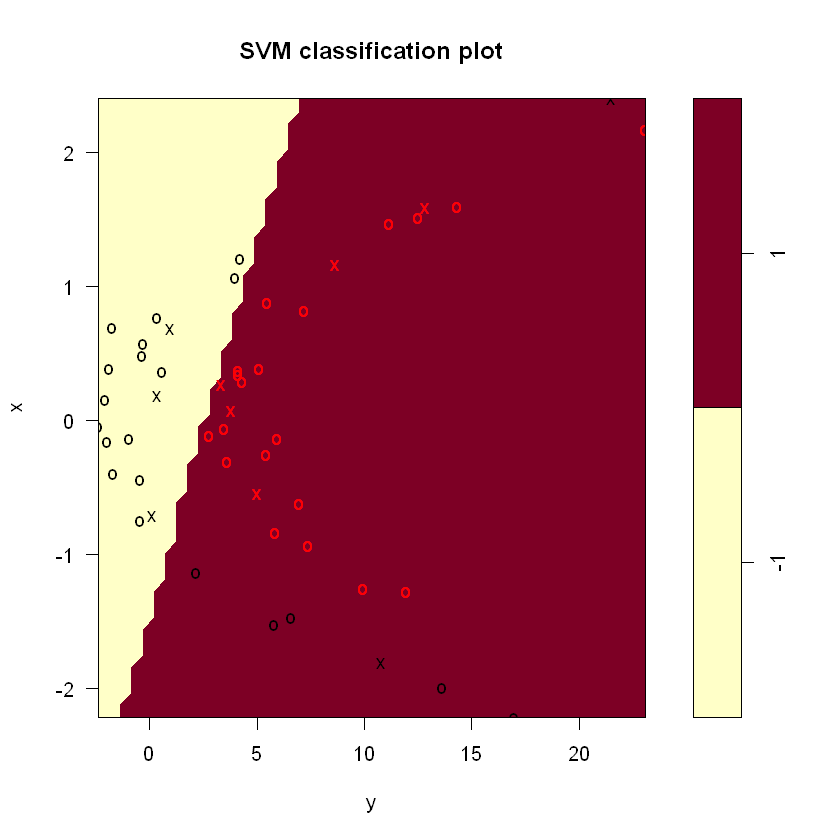

In [31]:
plot(svm.linear, data.test)

In [32]:
table(predict = predict(svm.linear, data.test), truth = data.test$z)

       truth
predict -1  1
     -1 18  0
     1   7 25

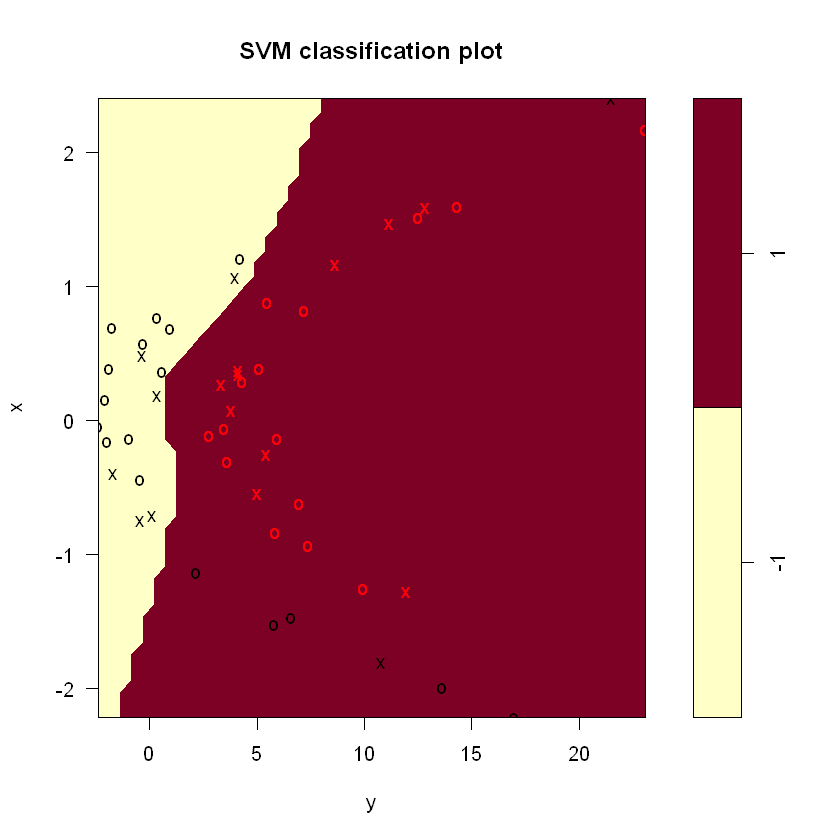

In [33]:
plot(svm.poly, data.test)

In [34]:
table(predict = predict(svm.poly, data.test), truth = data.test$z)

       truth
predict -1  1
     -1 18  0
     1   7 25

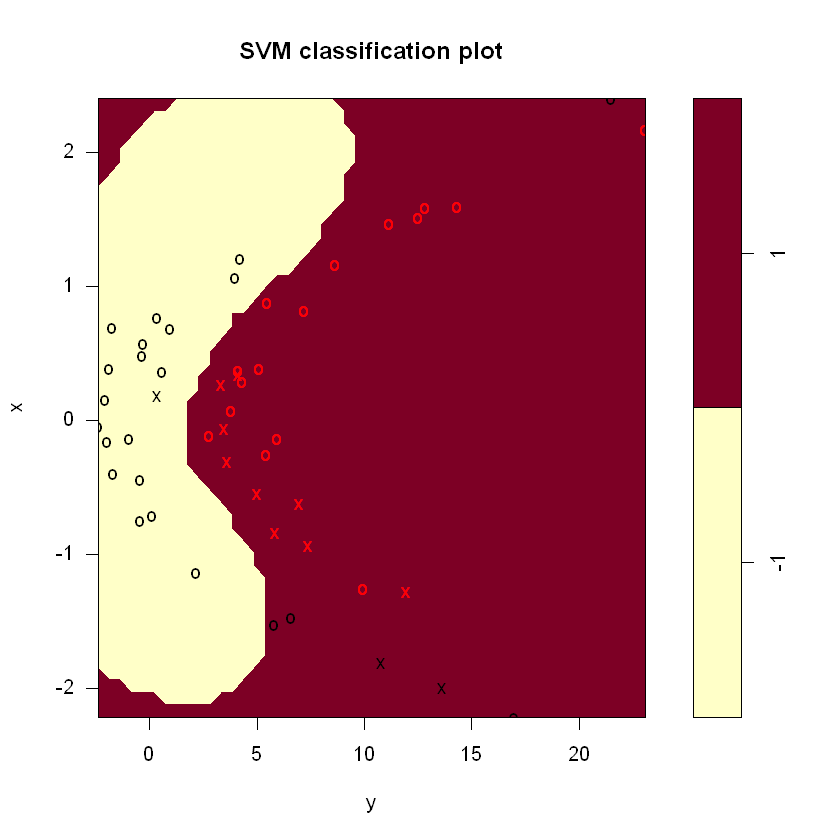

In [35]:
plot(svm.radial, data.test)

In [36]:
table(predict = predict(svm.radial, data.test), truth = data.test$z)

       truth
predict -1  1
     -1 19  0
     1   6 25

In [37]:
# 7 (p.371, Chap.9) 

In [42]:
install.packages("ISLR")


  There is a binary version available but the source version is later:
     binary source needs_compilation
ISLR    1.2    1.4             FALSE



installing the source package 'ISLR'



In [43]:
library(ISLR)
var <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$mpglevel <- as.factor(var)

In [45]:
set.seed(4)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01019231 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07647436 0.03587205
2 1e-01 0.05358974 0.02539087
3 1e+00 0.01019231 0.01315951
4 5e+00 0.02038462 0.02001214
5 1e+01 0.02294872 0.02534336
6 1e+02 0.04089744 0.03239108
7 1e+03 0.04089744 0.03239108


In [46]:
set.seed(4)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), degree = c(2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      2

- best performance: 0.2985256 

- Detailed performance results:
    cost degree     error dispersion
1  1e-02      2 0.5559615 0.04800046
2  1e-01      2 0.5559615 0.04800046
3  1e+00      2 0.5559615 0.04800046
4  5e+00      2 0.5559615 0.04800046
5  1e+01      2 0.4767308 0.13528664
6  1e+02      2 0.2985256 0.07443510
7  1e-02      3 0.5559615 0.04800046
8  1e-01      3 0.5559615 0.04800046
9  1e+00      3 0.5559615 0.04800046
10 5e+00      3 0.5559615 0.04800046
11 1e+01      3 0.5559615 0.04800046
12 1e+02      3 0.3472436 0.08788784
13 1e-02      4 0.5559615 0.04800046
14 1e-01      4 0.5559615 0.04800046
15 1e+00      4 0.5559615 0.04800046
16 5e+00      4 0.5559615 0.04800046
17 1e+01      4 0.5559615 0.04800046
18 1e+02      4 0.5559615 0.04800046


In [47]:
set.seed(4)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100  0.01

- best performance: 0.01532051 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-02 1e-02 0.55596154 0.04800046
2  1e-01 1e-02 0.09179487 0.06272654
3  1e+00 1e-02 0.07391026 0.03469713
4  5e+00 1e-02 0.05865385 0.02707063
5  1e+01 1e-02 0.02551282 0.01688386
6  1e+02 1e-02 0.01532051 0.01318724
7  1e-02 1e-01 0.18910256 0.07717255
8  1e-01 1e-01 0.08153846 0.04433006
9  1e+00 1e-01 0.06371795 0.03446496
10 5e+00 1e-01 0.03057692 0.02010376
11 1e+01 1e-01 0.02294872 0.01890223
12 1e+02 1e-01 0.02807692 0.02230794
13 1e-02 1e+00 0.55596154 0.04800046
14 1e-01 1e+00 0.55596154 0.04800046
15 1e+00 1e+00 0.06365385 0.04199145
16 5e+00 1e+00 0.06358974 0.03992217
17 1e+01 1e+00 0.06358974 0.03992217
18 1e+02 1e+00 0.06358974 0.03992217
19 1e-02 5e+00 0.55596154 0.04800046
20 1e-01 5e+00 0.55596154 0.04800046
21 1e+00 5e+00 0.51512821 0.06605516
22

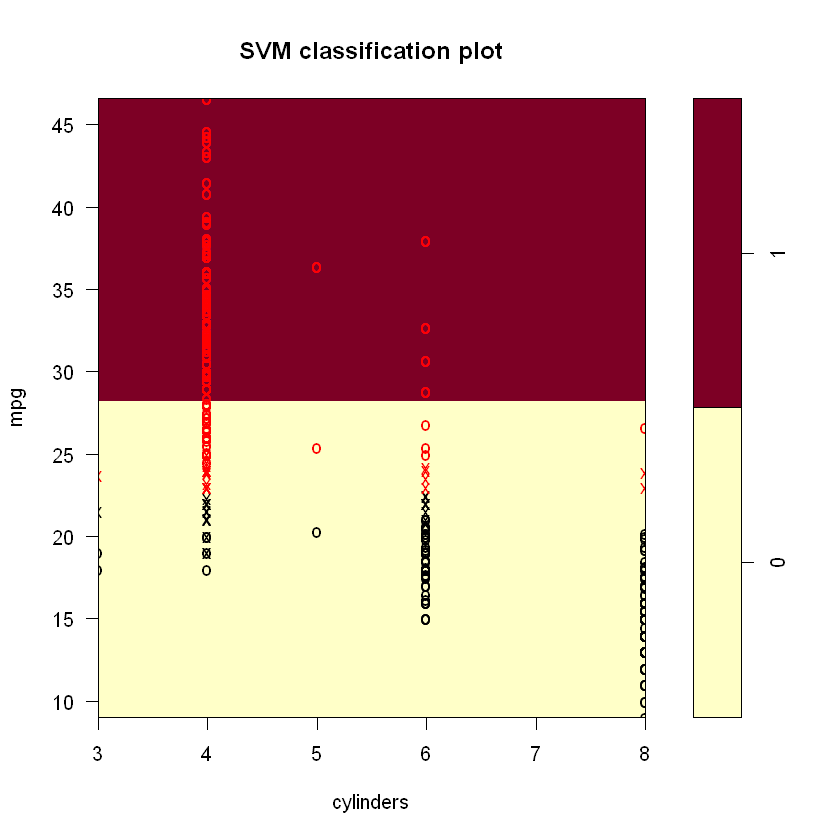

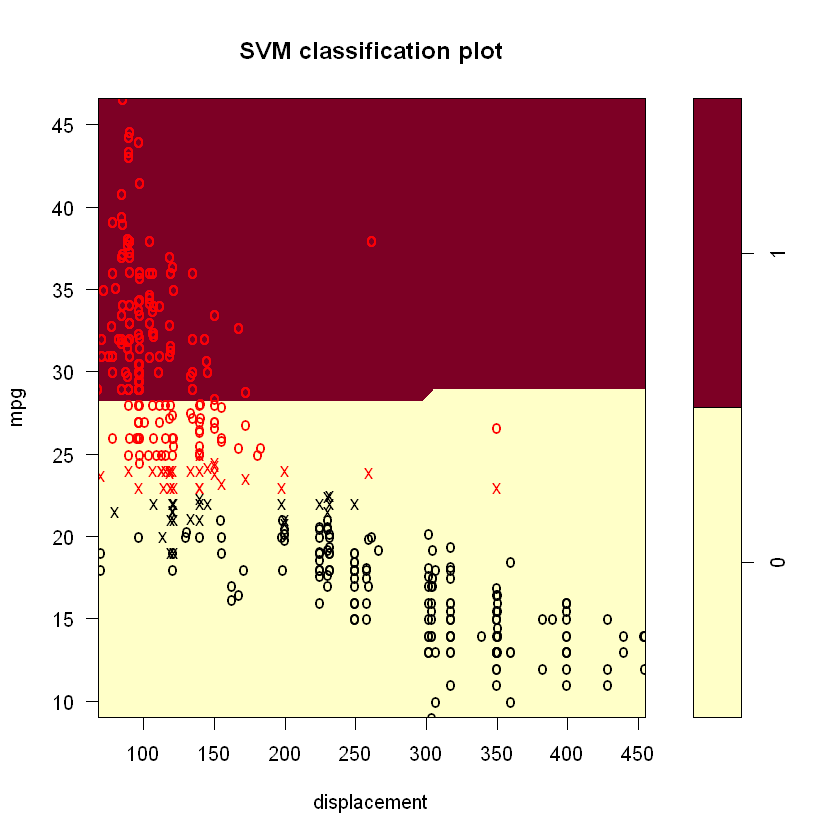

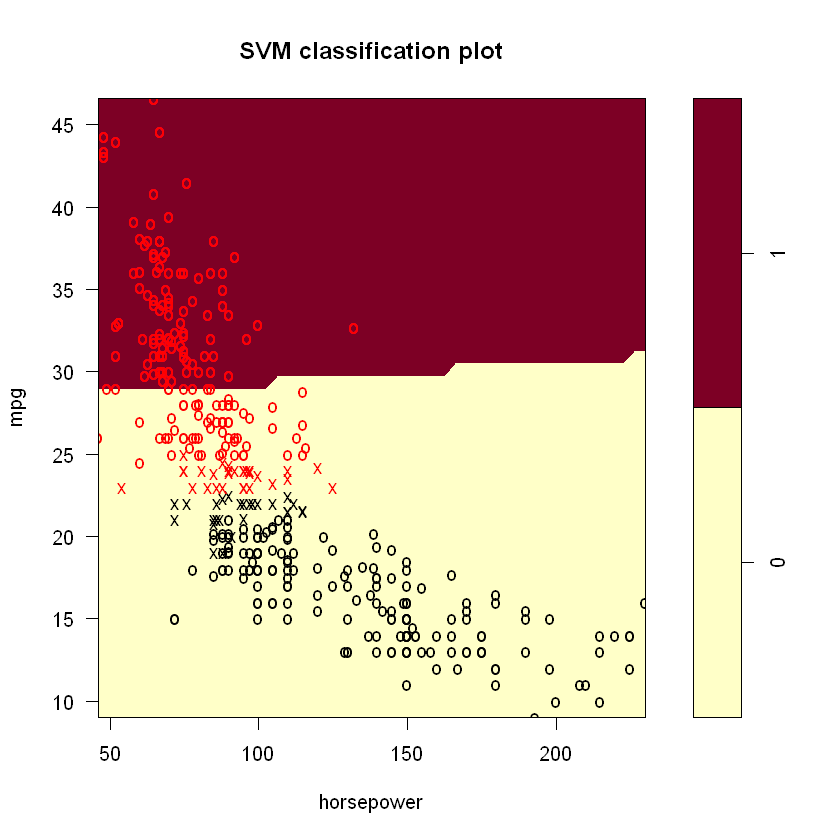

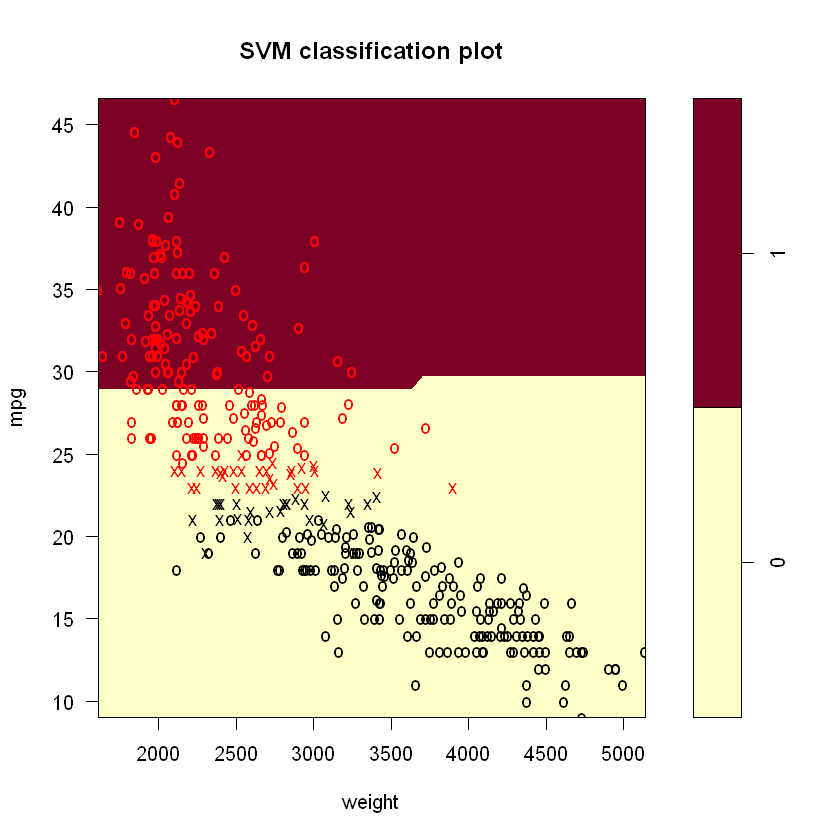

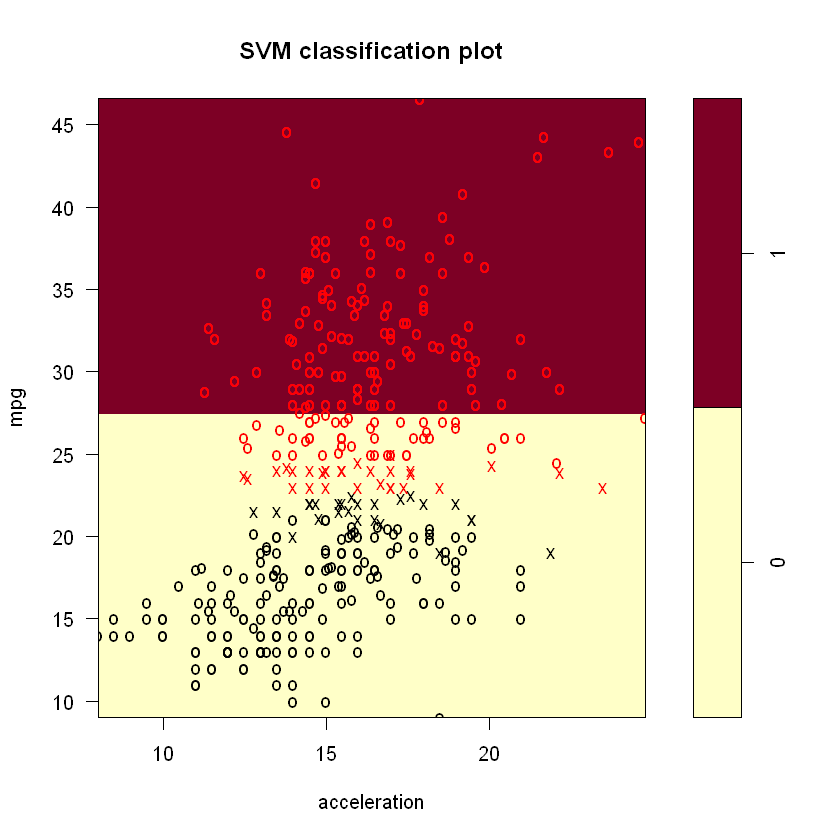

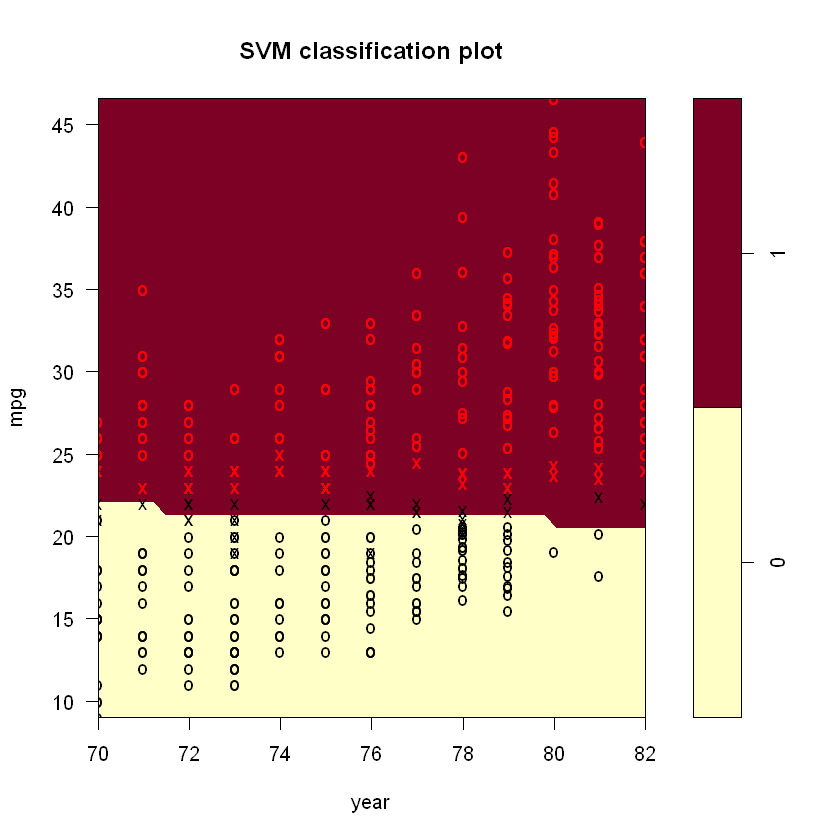

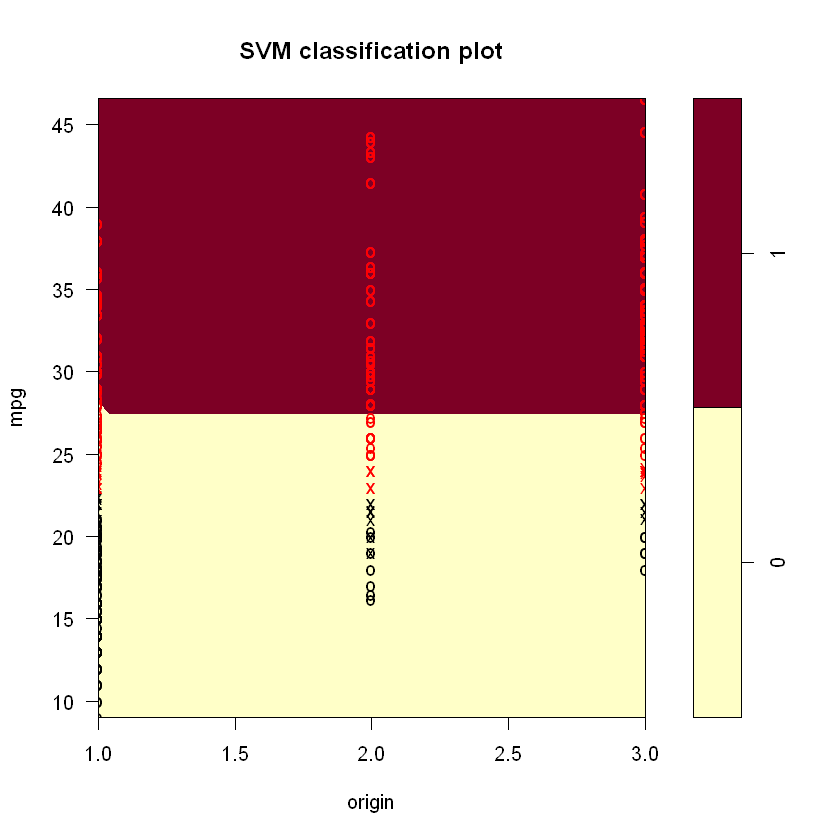

In [48]:
svm.linear <- svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly <- svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 100, degree = 2)
svm.radial <- svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)

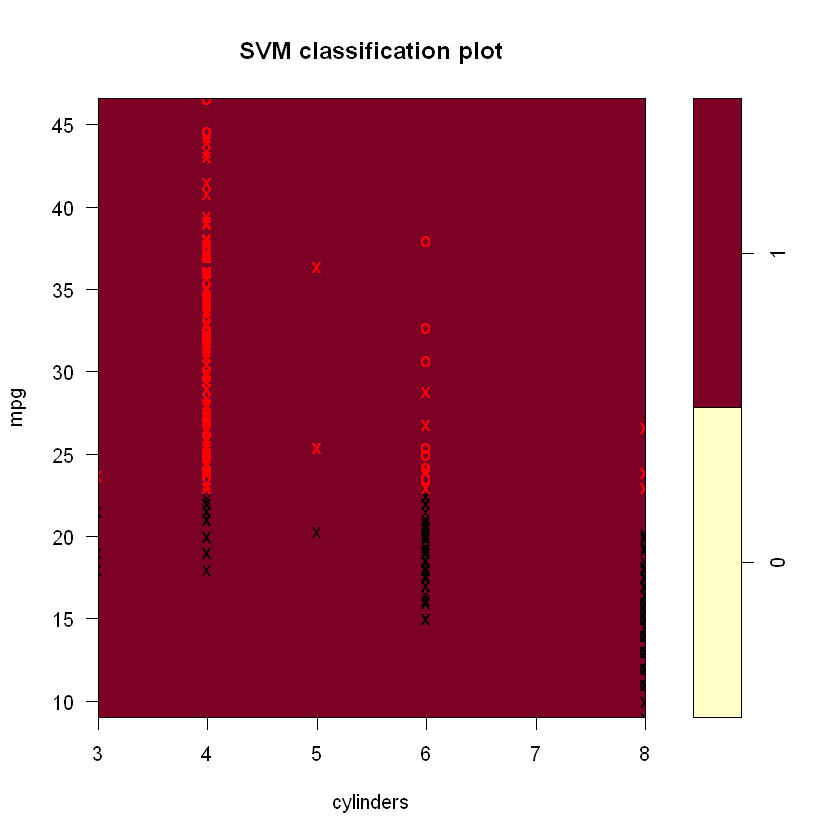

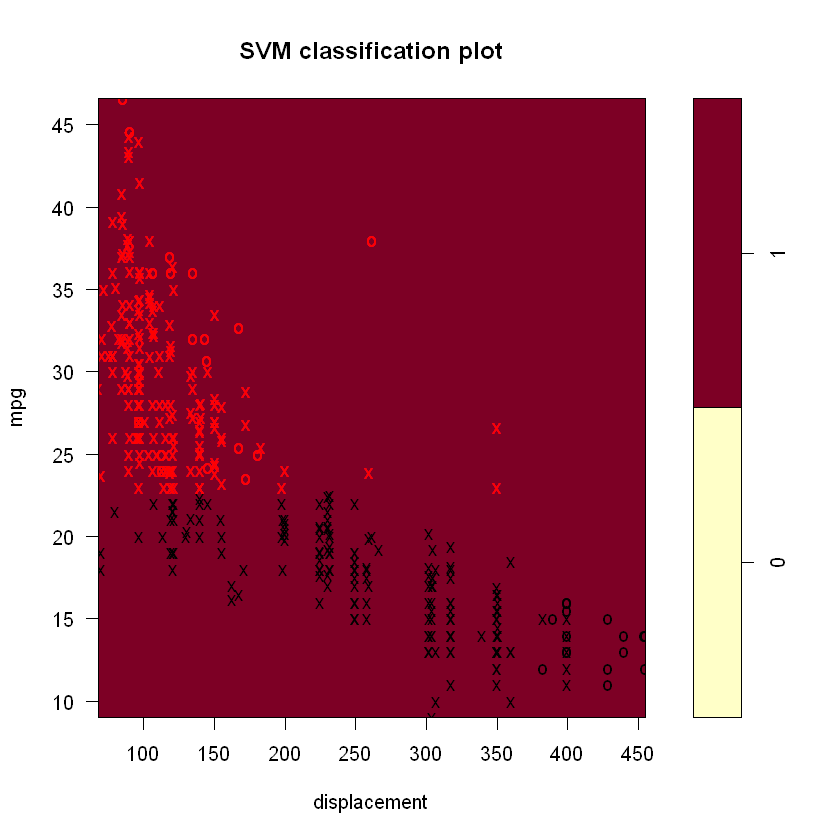

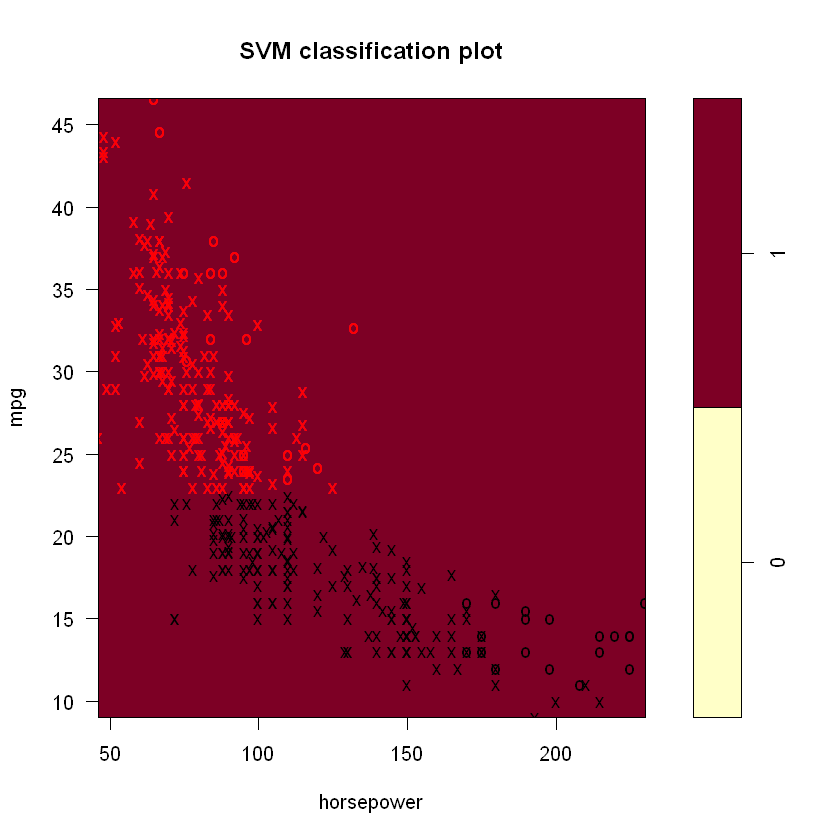

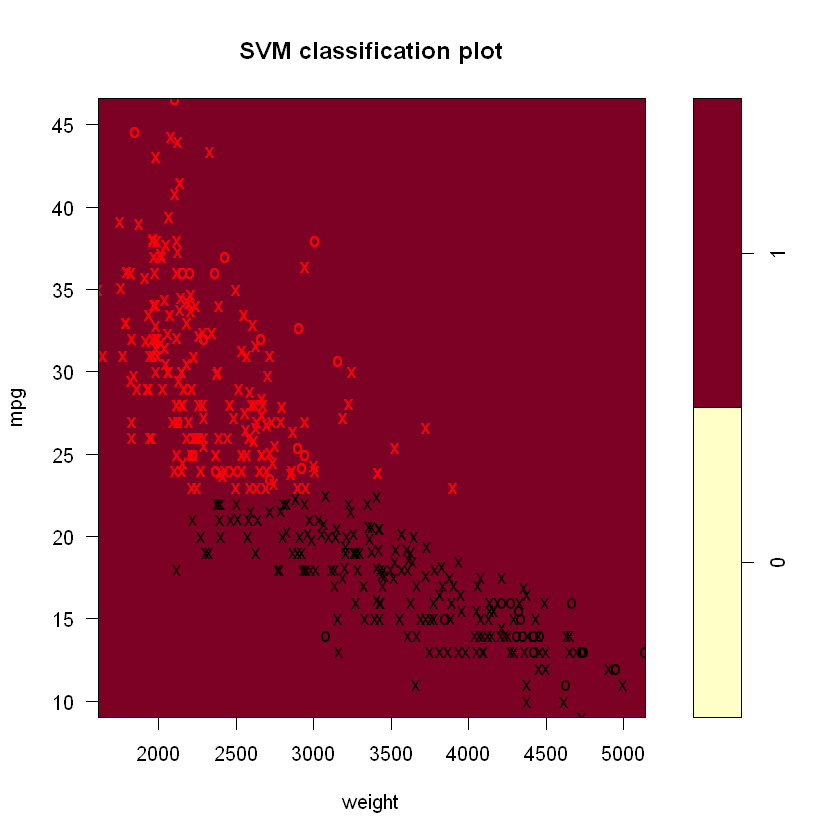

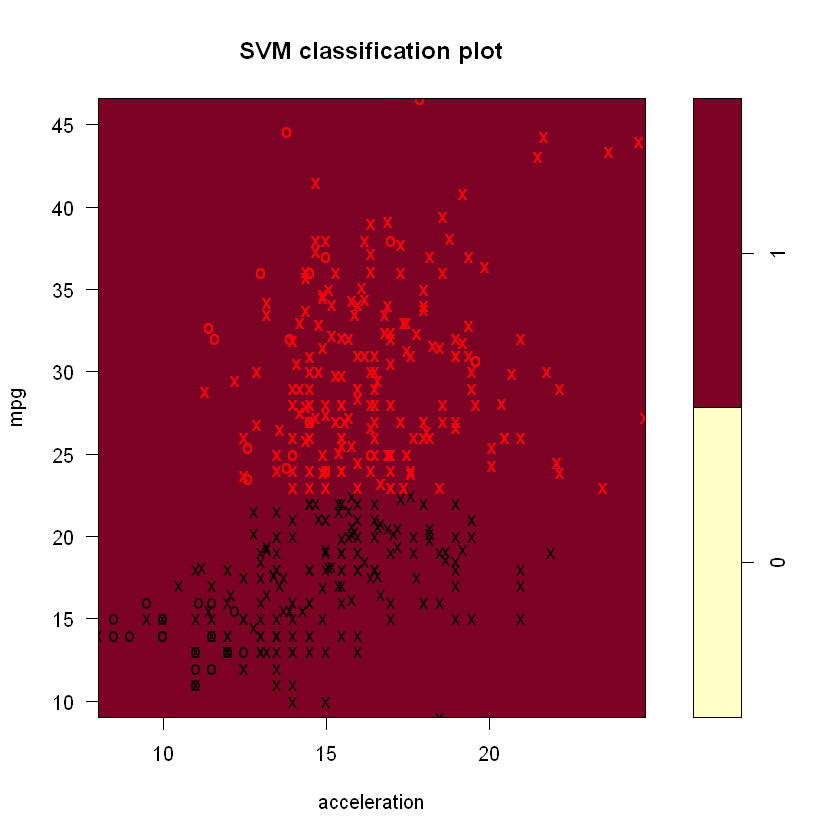

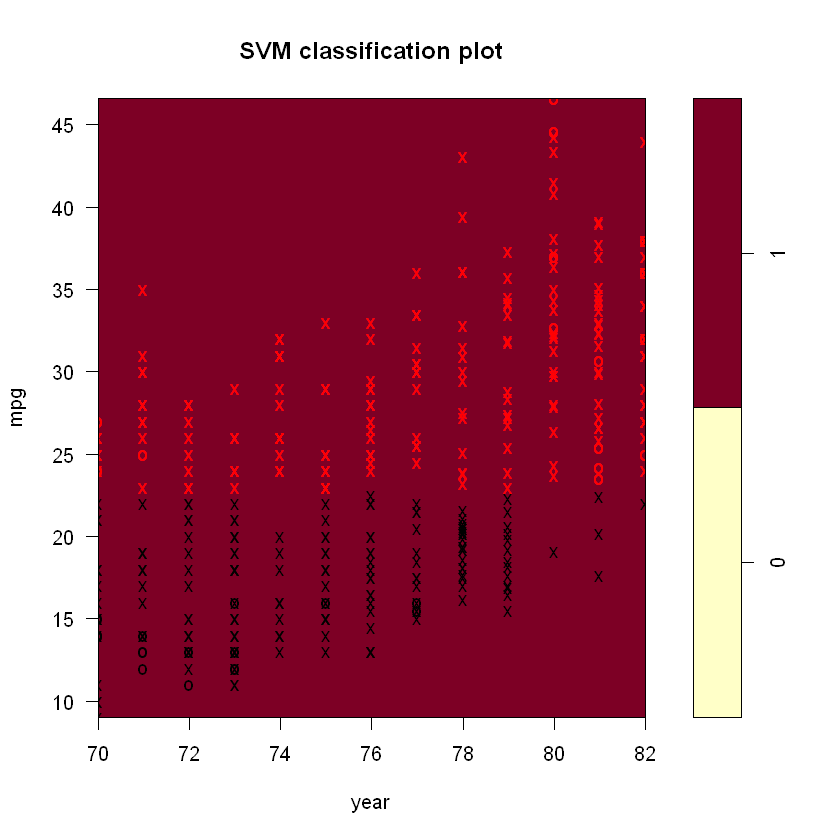

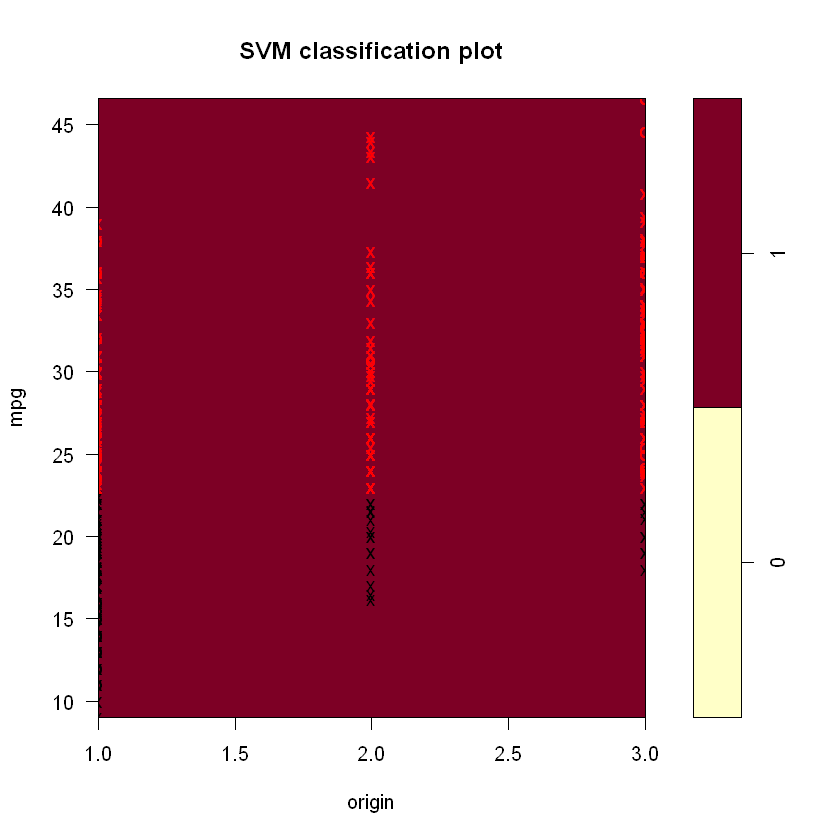

In [49]:
plotpairs(svm.poly)

In [6]:
# 8 (p.371)

In [50]:
set.seed(1)
train <- sample(nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

In [51]:
svm.linear <- svm(Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)
summary(svm.linear)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  435

 ( 219 216 )


Number of Classes:  2 

Levels: 
 CH MM




In [52]:
train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 420  65
  MM  75 240

In [53]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 153  15
  MM  33  69

In [54]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 1.778279

- best performance: 0.1675 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17625 0.04059026
2   0.01778279 0.17625 0.04348132
3   0.03162278 0.17125 0.04604120
4   0.05623413 0.17000 0.04005205
5   0.10000000 0.17125 0.04168749
6   0.17782794 0.17000 0.04090979
7   0.31622777 0.17125 0.04411554
8   0.56234133 0.17125 0.04084609
9   1.00000000 0.17000 0.04090979
10  1.77827941 0.16750 0.03782269
11  3.16227766 0.16750 0.03782269
12  5.62341325 0.16750 0.03545341
13 10.00000000 0.17000 0.03736085


In [55]:
svm.linear <- svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameter$cost)
train.pred <- predict(svm.linear, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 423  62
  MM  69 246

In [56]:
test.pred <- predict(svm.linear, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 156  12
  MM  29  73

In [57]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  373

 ( 188 185 )


Number of Classes:  2 

Levels: 
 CH MM




In [58]:
train.pred <- predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 441  44
  MM  77 238

In [59]:
test.pred <- predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 151  17
  MM  33  69

In [60]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.1725 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39375 0.03240906
2   0.01778279 0.39375 0.03240906
3   0.03162278 0.34750 0.05552777
4   0.05623413 0.19250 0.03016160
5   0.10000000 0.19500 0.03782269
6   0.17782794 0.18000 0.04048319
7   0.31622777 0.17250 0.03809710
8   0.56234133 0.17500 0.04124790
9   1.00000000 0.17250 0.03162278
10  1.77827941 0.17750 0.03717451
11  3.16227766 0.18375 0.03438447
12  5.62341325 0.18500 0.03717451
13 10.00000000 0.18750 0.03173239


In [61]:
svm.radial <- svm(Purchase ~ ., kernel = "radial", data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.radial)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  373

 ( 188 185 )


Number of Classes:  2 

Levels: 
 CH MM




In [62]:
train.pred <- predict(svm.radial, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 441  44
  MM  77 238

In [63]:
test.pred <- predict(svm.radial, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 151  17
  MM  33  69

In [64]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", data = OJ.train, degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  447

 ( 225 222 )


Number of Classes:  2 

Levels: 
 CH MM




In [65]:
train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 449  36
  MM 110 205

In [66]:
test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 153  15
  MM  45  57

In [67]:
set.seed(2)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "polynomial", degree = 2, ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.18 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.39000 0.03670453
2   0.01778279 0.37000 0.03395258
3   0.03162278 0.36375 0.03197764
4   0.05623413 0.34500 0.03291403
5   0.10000000 0.32125 0.03866254
6   0.17782794 0.24750 0.03322900
7   0.31622777 0.20250 0.04073969
8   0.56234133 0.20250 0.03670453
9   1.00000000 0.19625 0.03910900
10  1.77827941 0.19125 0.03586723
11  3.16227766 0.18000 0.04005205
12  5.62341325 0.18000 0.04133199
13 10.00000000 0.18125 0.03830162


In [68]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", degree = 2, data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2, cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  3.162278 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  385

 ( 197 188 )


Number of Classes:  2 

Levels: 
 CH MM




In [69]:
train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

    train.pred
      CH  MM
  CH 451  34
  MM  90 225

In [70]:
test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

    test.pred
      CH  MM
  CH 154  14
  MM  41  61

In [71]:
#radial basis kernel seems to show low misclassification error on both train and test data.